In [ ]:
#!pip install scikit-learn

In [ ]:
#!pip install pandas

In [ ]:
#!pip install yellowbrick

In [29]:
#!pip install transformers

In [ ]:
pip install -U sentence-transformers

## Define dataset

In [1]:
import numpy  as np
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import matplotlib.pyplot  as plt
from pathlib import Path
import os

In [2]:
file = open('repos_dict.json')
repos_dict = json.load(file)    

In [ ]:
REPO_NAME = 'repo_name'
FILE_NAME = 'file_name'
LANG = 'language'
CODE = 'code'
valid_languages = ['Java', 'Python', 'Shell', 'C++', 'Go']

def get_code_df(dirr):
    code_df = pd.DataFrame(columns=[REPO_NAME, FILE_NAME, LANG, CODE])
    for addr, folders, files in os.walk(dirr):
        if not folders:
            temp = get_files(addr, files)
            if type(temp) != bool:
                code_df = code_df.append(temp, ignore_index=True)
            else:
                pass
    return code_df
            

def get_files(folder_addr, file_names:list):
    result = []
    repo_name = folder_addr.split('/')[-2]
    language = folder_addr.split('/')[-1]
    if language not in valid_languages:
        return False
    for file in file_names:
        splitted_name = file.split('.')
        name = '.'.join(splitted_name[0:-2])
        code = Path(folder_addr+'/'+file).read_text()
        result.append((repo_name, name, language, code))
    return pd.DataFrame(result ,columns=[REPO_NAME, FILE_NAME, LANG, CODE])
    
data = get_code_df('preprocessed_data')
data.to_csv('code_v1.csv')

In [4]:
def get_concatanated(repo):
    text = ''
    for language in valid_languages:
        path = Path(f'preprocessed_data/{repo}/{language}')
        if not path.exists():
            continue
        for p in path.iterdir():
            code = p.read_text()
            text += code
            text += ' '
    return text

def get_valid_test():
    result = []
    for repo in repos_dict:
        if repo['language'] not in valid_languages:
            continue
        code = get_concatanated(repo['dir_name'])
        result.append((repo['dir_name'], repo['url'], repo['language'], code))
    return pd.DataFrame(result ,columns=[REPO_NAME, FILE_NAME, LANG, CODE])

In [5]:
repos_df = get_valid_test()

In [6]:
def get_part_of_data(counts):
    part_of_data =  pd.DataFrame(columns=[REPO_NAME, FILE_NAME, LANG, CODE])
    for count, language in zip(counts, valid_languages):
        part_of_data = part_of_data.append(data.loc[data[LANG] == language][0:count], ignore_index = True)
    return part_of_data

In [ ]:
counts = [200, 200, 200, 200, 200]
data1 = get_part_of_data(counts).append(repos_df, ignore_index=True)
true_labels = [label for label, count in enumerate(counts) for _ in range(count)]

In [8]:
data1 = data1[:1000]
data1

,repo_name,file_name,language,code
0,itinance_react-native-fs,android.src.main.java.com.rnfs.IORejectionExce...,Java,package com . rnfs ; class IORejectionExceptio...
1,itinance_react-native-fs,android.src.main.java.com.rnfs.Uploader,Java,package com . rnfs ; import android . os . Asy...
2,itinance_react-native-fs,android.src.main.java.com.rnfs.UploadResult,Java,package com . rnfs ; import com . facebook . r...
3,itinance_react-native-fs,android.src.main.java.com.rnfs.DownloadParams,Java,package com . rnfs ; import java . io . File ;...
4,itinance_react-native-fs,android.src.main.java.com.rnfs.RNFSPackage,Java,package com . rnfs ; import java . util . * ; ...
...,...,...,...,...
995,inancgumus_learngo,14-arrays.06-challenge-moodly.challenge.main,Go,/ / / / / / / / / / / / / / package main / / ...
996,inancgumus_learngo,16-slices.exercises.20-observe-the-cap-growth....,Go,/ / / / / / / / / / / / / / package main impo...
997,inancgumus_learngo,06-variables.01-basic-data-types.exercises.02-...,Go,/ / / / / / / / / / / / / / package main impo...
998,inancgumus_learngo,26-pointers.03-pointers-composites.main,Go,/ / / / / / / / / / / / / / package main impo...


In [9]:
set(repos_df[LANG])

{'C++', 'Go', 'Java', 'Python', 'Shell'}

In [10]:
repos_df

,repo_name,file_name,language,code
0,gothinkster_realworld,https://github.com/gothinkster/realworld,Shell,"# set - x SCRIPTDIR = "" "" $ ( dirname "" "" ) ""..."
1,nvm-sh_nvm,https://github.com/nvm-sh/nvm,Shell,"# { # nvm_has ( ) { type "" "" > / dev / null N..."
2,jgraph_drawio-desktop,https://github.com/jgraph/drawio-desktop,Shell,# set - eo pipefail # SOURCE_FILE_PATH = ' ' ...
3,mathiasbynens_dotfiles,https://github.com/mathiasbynens/dotfiles,Shell,"# cd "" "" $ { BASH_SOURCE } "" "" ; git pull ori..."
4,dwmkerr_hacker-laws,https://github.com/dwmkerr/hacker-laws,Shell,"# # # # version = $ NUM date = $ ( date "" "" )..."
...,...,...,...,...
145,sanic-org_sanic,https://github.com/sanic-org/sanic,Python,import asyncio import sys from typing import A...
146,nginx-proxy_nginx-proxy,https://github.com/nginx-proxy/nginx-proxy,Python,import pytest def test_arbitrary_headers_are_p...
147,binux_pyspider,https://github.com/binux/pyspider,Python,# # # # # # import os import re import six im...
148,openai_gpt-2,https://github.com/openai/gpt-2,Python,import numpy as np import tensorflow as tf fro...


In [11]:
X_text = list(data1[CODE])
Y = list(valid_languages.index(y) for y in data1[LANG])

In [12]:
X_text_repo = list(repos_df[CODE])
Y_repo = list(valid_languages.index(y) for y in repos_df[LANG])

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=None, norm='l2')
total_tfidf = vectorizer.fit_transform([x for x in X_text] + [x for x in X_text_repo])

In [14]:
total_tfidf

<1150x118681 sparse matrix of type '<class 'numpy.float64'>'
	with 221345 stored elements in Compressed Sparse Row format>

In [15]:
X_tfidf = total_tfidf[:1000]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_testval, Y_train, Y_testval = train_test_split(X_tfidf, Y, test_size=0.2, random_state=1)
X_val, X_test, Y_val, Y_test = train_test_split(X_testval, Y_testval, test_size=0.5, random_state=1)

## Classification

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [18]:
Y_predict = clf.predict(X_test)

## Calculate f1 score

In [19]:
from sklearn.metrics import f1_score

In [20]:
f1_score(Y_test, Y_predict, average='macro')

0.9571428571428571

In [21]:
f1_score(Y_test, Y_predict, average='micro')

0.96

As you see our f1-score both in macro case and micro case is more than 0.95

## Visualize

In [22]:
from yellowbrick.text import TSNEVisualizer

def plotted_scatter(vectorized_data, label):
    tsne = TSNEVisualizer()
    tsne.fit(vectorized_data, label)
    tsne.show()

Here we will visualize our results for 900 codes of Java, Python, C++, Shell, and Go.

/usr/local/Cellar/ipython/8.4.0/libexec/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/Cellar/ipython/8.4.0/libexec/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend t

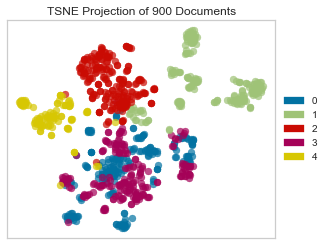

In [23]:
Y_predict = clf.predict(X_tfidf)
plotted_scatter(X_tfidf[:900], Y_predict[:900])

As you see these 4 languages has been separated in the picture successfully. Only C++ and Java are tied together, which makes sense considering the similarity between these 2 languages.

Now we will draw the results using the true labels.

/usr/local/Cellar/ipython/8.4.0/libexec/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/Cellar/ipython/8.4.0/libexec/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend t

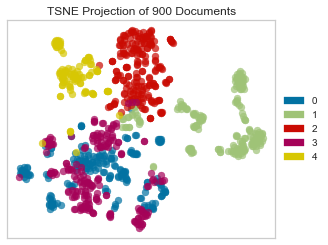

In [24]:
plotted_scatter(X_tfidf[:900], Y[:900])

We can easily see the similarity between these results and results we made.

## Visualize concatanated repo codes result

Here we will concatanate all the codes in any repository to predict what is the most used language in that repository

In [25]:
X_tfidf_repo = total_tfidf[1000:]

/usr/local/Cellar/ipython/8.4.0/libexec/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/Cellar/ipython/8.4.0/libexec/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend t

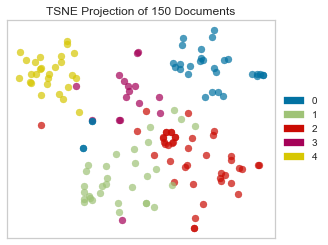

In [26]:
Y_predict_repo = clf.predict(X_tfidf_repo)
plotted_scatter(X_tfidf_repo, Y_predict_repo)

Again we can see the similarity between visualization of our answer and the correct answer.

/usr/local/Cellar/ipython/8.4.0/libexec/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/Cellar/ipython/8.4.0/libexec/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend t

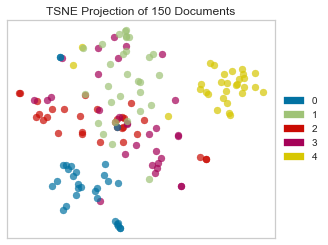

In [27]:
plotted_scatter(X_tfidf_repo, Y_repo)

## Transformer

In [ ]:
import torch

In [30]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/Cellar/ipython/8.4.0/libexec/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
Downloading: 100%|███████████████████████████| 28.0/28.0 [00:00<00:00, 8.89kB/s]
Downloading: 100%|██████████████████████████████| 483/483 [00:00<00:00, 208kB/s]
Downloading: 100%|███████████████████████████| 226k/226k [00:03<00:00, 59.5kB/s]
Downloading: 100%|███████████████████████████| 455k/455k [00:04<00:00, 93.5kB/s]


In [32]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
training_args = TrainingArguments(
    output_dir = './results',
    num_train_epochs = 7,
    per_device_train_batch_size = 200,
    per_device_eval_batch_size = 64,  
    warmup_steps = 300,
    weight_decay = 0.01,
    logging_dir = './logs',
    logging_steps = 10,
)

## Technical Report

<div dir = "rtl">
    در این پروژه تمام کد‌های ریپازیتوری‌های crawl شده را در نظر گرفتیم و با استفاده از TfidfVectorizer برای تمام کد ها بردار متناظرشان را بدست آوردیم.
    سپس با استفاده از sklearn و با دانستن زبان هر کد (که لیبل اصلی آن محسوب می‌شود) روی این داده‌ها کار training را انجام دادیم.
    با استفاده از مدل بدست آورده زبان تمام کد‌هایی که برای بخش test گذاشتیم را پیش‌بینی کرده و مشاهده کردیم که بالای ۹۵٪ پاسخ‌ها صحیح هستند.
    برای هر ریپازیتوری نیز برای آنکه زبانی که بیشترین میزان استفاده شده را تخمین بزنیم تمام کد‌های آن را concat کردیم و روی حاصل prediction را انجام دادیم.
    در نهایت نتایج بدست آمده را روی نمودار رسم کردیم.
</div>

<div dir = "rtl">
    تمام توضیحات چگونگی crawling و دیگر مواردی که در بخش clustring نیز انجام شده‌اند در notebook مخصوص clustering قابل مشاهده است.
</div>